In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('HealthApp_2k.log_structured.csv')

In [8]:
#looking at first five entries
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [5]:
#looking at last five entries
df.tail()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
1995,1996,20171224-0:58:53:985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1996,1997,20171224-0:59:7:581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1997,1998,20171224-1:0:0:794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1998,1999,20171224-1:1:0:935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1999,2000,20171224-1:2:35:789,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...


In [26]:
#checking for null values and no null values were found
df.isnull().sum()

LineId           0
Time             0
Component        0
Pid              0
Content          0
EventId          0
EventTemplate    0
Time_Only        0
dtype: int64

# What I have gathered...
Looking at Head and Tail of data, it is clear that entries start at 10:15 pm of night of 23rd december 2017 and end at 1:02 am of morning of 24th December 2017. Since it's all happening consecutively, then let's clear our data of dates to make it more coherent.

In [52]:
# Convert the 'Time' column to a datetime object
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Extract the time part (HH:MM:SS:fff) from the datetime without trailing zeros in milliseconds
df['Time_Only'] = df['Time'].dt.strftime('%H:%M:%S:%f').str.rstrip('0')

#dropping time column
df1= df.drop(['Time', 'Pid'], axis=1)

In [53]:
df1.head()

,LineId,Component,Content,EventId,EventTemplate,Time_Only
0,1,Step_LSC,onStandStepChanged 3579,E42,onStandStepChanged <*>,22:15:29:606
1,2,Step_LSC,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,22:15:29:615
2,3,Step_StandReportReceiver,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,22:15:29:633
3,4,Step_LSC,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,22:15:29:635
4,5,Step_StandStepCounter,flush sensor data,E12,flush sensor data,22:15:29:635


# Let's Look at Component column 
The most evoked component is Step_LSC

Step_LSC                       710
Step_SPUtils                   494
Step_ExtSDM                    482
Step_StandReportReceiver       171
HiH_HiSyncControl               42
Step_StandStepCounter           19
HiH_DataStatManager             17
HiH_HiHealthDataInsertStore     11
HiH_                            10
HiH_HiHealthBinder               9
HiH_HiAppUtil                    8
Step_FlushableStepDataCache      8
HiH_HiBroadcastUtil              5
Step_StandStepDataManager        5
HiH_ListenerManager              2
HiH_HiSyncUtil                   2
Step_HGNH                        2
Step_ScreenUtil                  1
Step_DataCache                   1
Step_NotificationUtil            1
Name: Component, dtype: int64


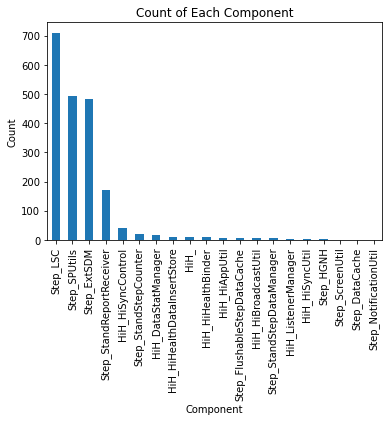

In [54]:
# Count the occurrences of each unique value in the 'Component' column
component_counts = df1['Component'].value_counts()

#print the result
print(component_counts)

# Create a bar graph to visualize the counts
component_counts.plot(kind='bar')
plt.xlabel('Component')
plt.ylabel('Count')
plt.title('Count of Each Component')
plt.show()

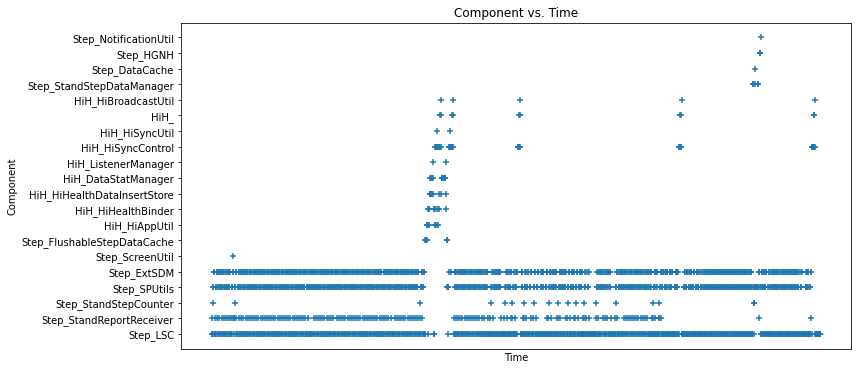

In [55]:
# Create a bar chart of components being evoked against time
plt.figure(figsize=(12, 6))
plt.scatter(df1.index, df1['Component'], marker='+')
plt.xlabel('Time')
plt.ylabel('Component')
plt.title('Component vs. Time')
plt.xticks([])
plt.show()

From this graph we can see uses of Components of HealthApp with time. As we can see Components like HiH_ListenerManager, HiH_HiSyncUtil, Step_HGNH, Step_ScreenUtil, Step_DataCache, Step_NotificationUtil have been rarely used. And components like Step_LSC, Step_ExtSDM and Step_SPUtils have been constantly evoved throughout 4 hours. 

# Now let's see what kinds of events are associated with each Component

In [56]:
# Group the data by 'Component' and aggregate the 'EventID' values into a list
component_templates = df1.groupby('Component')['EventId'].unique().reset_index()

# Iterate through the grouped data and print Component and associated EventID
for index, row in component_templates.iterrows():
    component = row['Component']
    event_Id_list = row['EventId']
    
    print(f"Component: {component}, Associated EventId: {', '.join(event_Id_list)}\n")



Component: HiH_, Associated EventId: E24, E27

Component: HiH_DataStatManager, Associated EventId: E37

Component: HiH_HiAppUtil, Associated EventId: E16

Component: HiH_HiBroadcastUtil, Associated EventId: E54

Component: HiH_HiHealthBinder, Associated EventId: E15, E32, E34, E31, E33

Component: HiH_HiHealthDataInsertStore, Associated EventId: E49, E52, E50, E2, E51

Component: HiH_HiSyncControl, Associated EventId: E8, E7, E67, E62, E61, E64, E36, E25, E28, E23, E65, E66, E5

Component: HiH_HiSyncUtil, Associated EventId: E6

Component: HiH_ListenerManager, Associated EventId: E63

Component: Step_DataCache, Associated EventId: E9

Component: Step_ExtSDM, Associated EventId: E4, E3

Component: Step_FlushableStepDataCache, Associated EventId: E75, E72, E29, E30

Component: Step_HGNH, Associated EventId: E38, E10

Component: Step_LSC, Associated EventId: E42, E39, E43, E44, E14, E1, E74, E73, E13, E69, E21

Component: Step_NotificationUtil, Associated EventId: E11

Component: Step_SPU

In [66]:
#Function to get Events associated with a component
def getEventsOfComponent(df1, Component_name):
    Component_df1 = df1[df1['Component'] == Component_name]
    # Get unique pairs of 'EventId' and 'EventTemplate' from the filtered DataFrame
    unique_event_pairs = Component_df1[['EventId', 'EventTemplate']].drop_duplicates().reset_index(drop=True)
    print(f"Unique EventId and EventTemplate pairs with Component {Component_name}:")
    print(unique_event_pairs)


In [69]:
getEventsOfComponent(df1, 'Step_LSC')

Unique EventId and EventTemplate pairs with Component Step_LSC:
   EventId                                      EventTemplate
0      E42                             onStandStepChanged <*>
1      E39                           onExtend:<*> <*> <*> <*>
2      E43  processHandleBroadcastAction action:android.in...
3      E44  processHandleBroadcastAction action:android.in...
4      E14                        flushTempCacheToDB by stand
5       E1  Alarm uploadStaticsToDB totalSteps=<*>:<*>:<*>...
6      E74  uploadStaticsToDB() onResult  type = <*> obj=true
7      E73              uploadStaticsToDB failed message=true
8      E13                            flush2DB result success
9      E69           timeStamp back,extendReportTimeStamp=<*>
10     E21          getTodaySportData mStepsRecordManager=<*>


In [73]:
getEventsOfComponent(df1, 'Step_ExtSDM')

Unique EventId and EventTemplate pairs with Component Step_ExtSDM:
  EventId                                 EventTemplate
0      E4  calculateCaloriesWithCache totalCalories=<*>
1      E3  calculateAltitudeWithCache totalAltitude=<*>


In [74]:
getEventsOfComponent(df1, 'Step_SPUtils')

Unique EventId and EventTemplate pairs with Component Step_SPUtils:
   EventId                                      EventTemplate
0      E22  getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...
1      E58                       setTodayTotalDetailSteps=<*>
2      E60                       setWriteDBLastDataMinute=<*>
3      E59                   setWriteDBLastDataMinute success
4      E18                               getStepCounterStatus
5      E19                         getStepCounterStatus= true
6      E20          getTodayBasicStandardSteps= <*>##<*>##<*>
7      E17                        getDiffTotalSteps= <*>##<*>
8      E55  setBasicStandardSteps basicStandardStep=<*> re...
9      E56                              setDiffTotalSteps=<*>
10     E57                 setGoalNotifiShownRecord <*> false


# Plotting occurence of events associated with a component with respect to time

In [91]:
def plot_event_occurrence_over_time(dataframe, component_name):
    # Filter the DataFrame to select rows with the specified component
    component_df = dataframe[dataframe['Component'] == component_name]
    
   # Convert 'Time' column to datetime format and set it as the DataFrame's index
    component_df['Time'] = pd.to_datetime(component_df['Time'])
    component_df.set_index('Time', inplace=True)
    
    # Create a line plot of 'EventId' over time
    plt.figure(figsize=(12, 6))
    plt.scatter(component_df.index, component_df['EventId'], marker='+', color='red')
    plt.xlabel('Time')
    plt.ylabel('EventId')
    plt.title(f'EventId vs. Time for Component {component_name}')
    plt.grid(True)
    plt.show()



C:\Users\my\AppData\Local\Temp\ipykernel_3104\703944565.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  component_df['Time'] = pd.to_datetime(component_df['Time'])


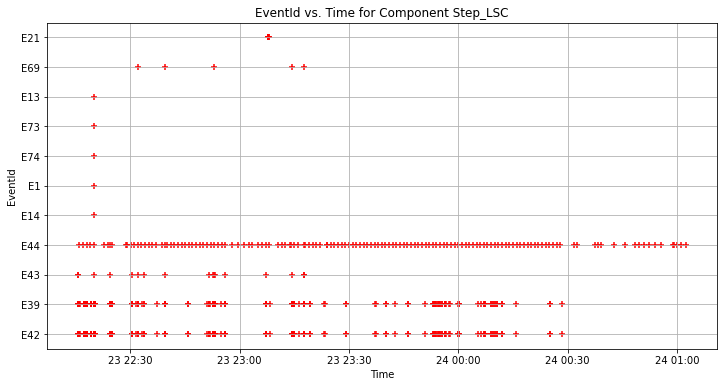

In [92]:
# here we'll use df to analyze events with respect to time
plot_event_occurrence_over_time(df, 'Step_LSC')

This scatter plot gives occurances of Events of Component 'Step_LSC' from 10 pm of 23rd december to 1 am of 24th december. The most frequent even is E44, i.e., 'processHandleBroadcastAction action:android.in...'

C:\Users\my\AppData\Local\Temp\ipykernel_3104\703944565.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  component_df['Time'] = pd.to_datetime(component_df['Time'])


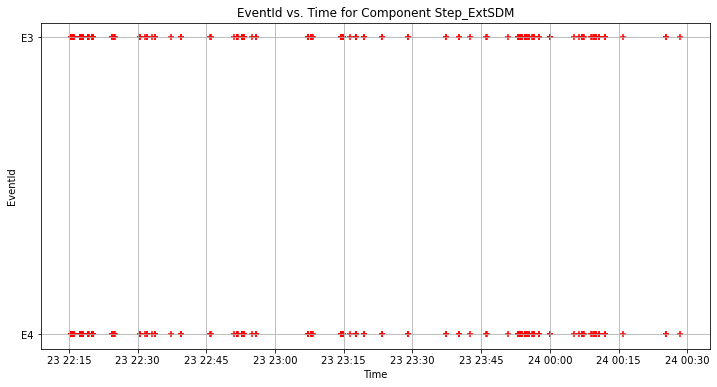

In [93]:
plot_event_occurrence_over_time(df, 'Step_ExtSDM')

Here events E4- calculateCaloriesWithCache totalCalories=<*>, and E3- calculateAltitudeWithCache totalAltitude=<*>, of Component 'Step_ExtSDM' are occuring at the same time.

C:\Users\my\AppData\Local\Temp\ipykernel_3104\703944565.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  component_df['Time'] = pd.to_datetime(component_df['Time'])


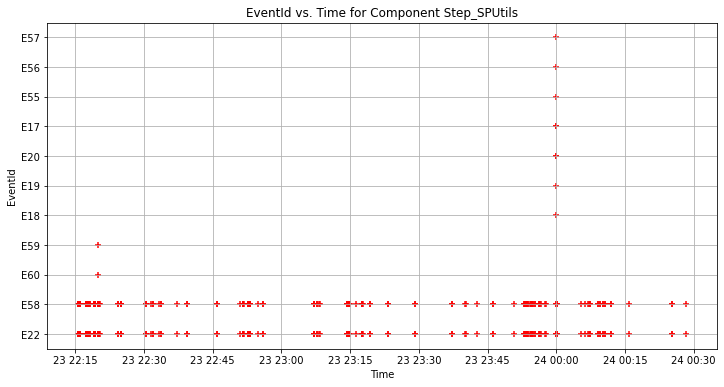

In [94]:
plot_event_occurrence_over_time(df, 'Step_SPUtils')

Here, for component 'Step_SPUtils' events E22- getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#. and event E58- setTodayTotalDetailSteps=<*> takes the cake, and also they accur almost at same time